# Group Project: Identifying Gender from Voice Features

### Project Overview:
This project has the intention of analyzing human voice samples in order to create multiple predictive models that can accurately identify the speakers as male or female.


### The Dataset
We will use the dataset provided by kaggle to train our models. The data was sourced from Kaggle and includes 3,168 voice samples that have been preprocessed in R's seewave and tuneR software packages, with an analyzed frequency range of 0hz-280hz (human vocal range). We will be using 75% of the original data for training and the rest for testing.

Each sample consists of 20 unique acoustic parameters per sample, with a lebel either male or female:
    1. meanfreq: mean frequency (in kHz)
    2. sd: standard deviation of frequency
    3. median: median frequency (in kHz)
    4. Q25: first quantile (in kHz)
    5. Q75: third quantile (in kHz)
    6. IQR: interquantile range (in kHz)
    7. skew: skewness (see note in specprop description)
    8. kurt: kurtosis (see note in specprop description)
    9. sp.ent: spectral entropy
    10. sfm: spectral flatness
    11. mode: mode frequency
    12. centroid: frequency centroid (see specprop)
    13. meanfun: average of fundamental frequency measured across acoustic signal
    14. minfun: minimum fundamental frequency measured across acoustic signal
    15. maxfun: maximum fundamental frequency measured across acoustic signal
    16. meandom: average of dominant frequency measured across acoustic signal
    17. mindom: minimum of dominant frequency measured across acoustic signal
    18. maxdom: maximum of dominant frequency measured across acoustic signal
    19. dfrange: range of dominant frequency measured across acoustic signal
    20. modindx: modulation index. 
    

    


The models we chose are as following:
    1. Neural Network
    2. KNN
    3. Gaussian Naive Bayes
    4. Logistic Regression
    5. Random Forest
    6. SVM


### This notebook will focus on understanding and visualizing the data before we proceed to generate various machine learning algorithms.

In [11]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [12]:
path = '/Users/Shirley/Desktop/Gender_Recognition_by_Voice/voice.csv'
voice_data = pd.read_csv(path)

In [13]:
voice_data["label"].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [14]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [15]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


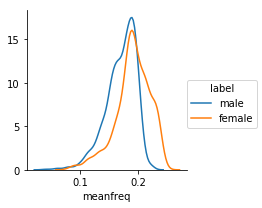

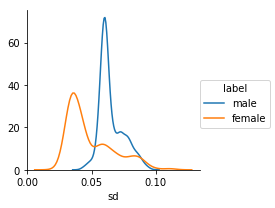

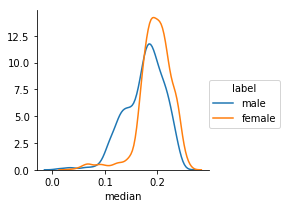

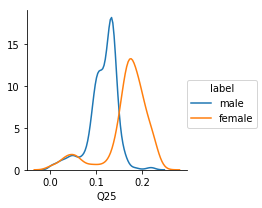

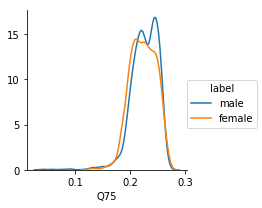

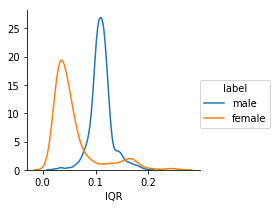

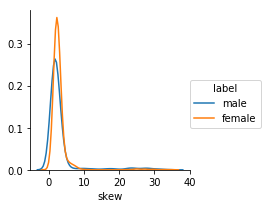

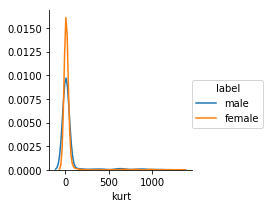

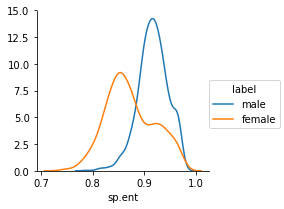

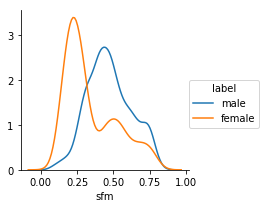

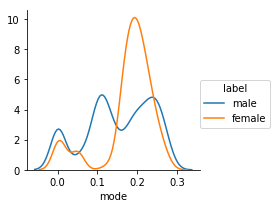

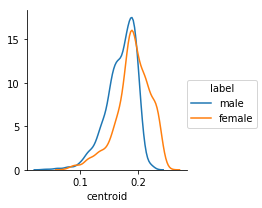

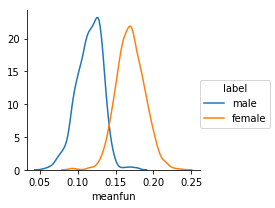

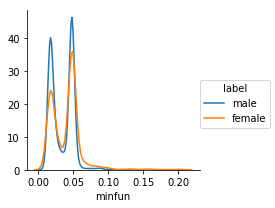

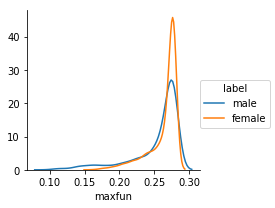

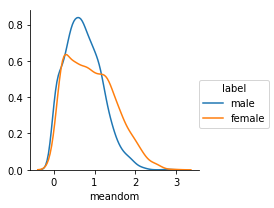

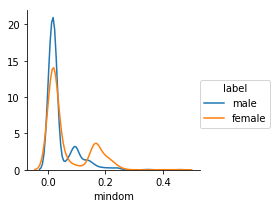

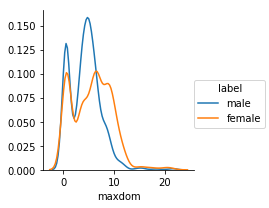

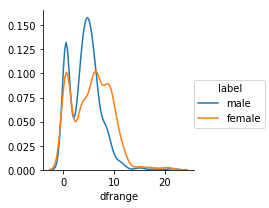

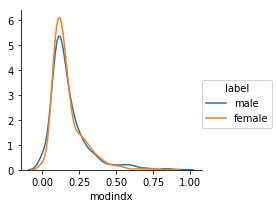

In [16]:
# Part 2: Data Visualization
for col in voice_data.columns[:-1]:
    sns.FacetGrid(voice_data, hue="label", size=3).map(sns.kdeplot, col).add_legend()
    plt.show()

### Our observation: 
At first glance, most significant features are IQR and meanfun. As one would expect, the fundamental frequencies exhibited by male voices are much lower than those exhibited by females and interquantile range exhibited by male voices are much higher than those exhibited by females. 

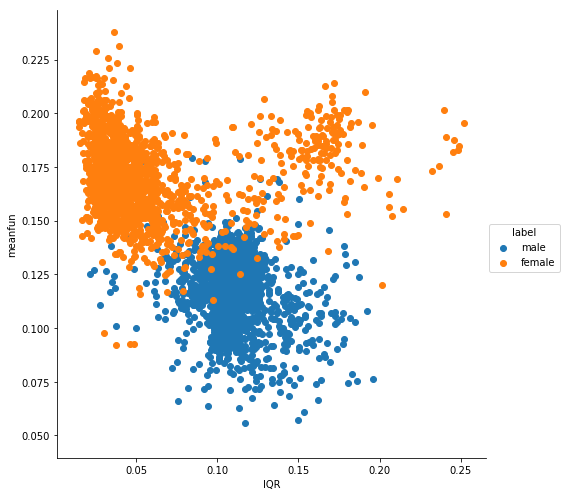

In [17]:
sns.FacetGrid(voice_data, hue="label", size=7).map(plt.scatter, "IQR", "meanfun").add_legend()
plt.show()

###### As we could see, there are some samples that belong to male but graph tells us that it is female.

### Is it enough of this two features to make predictions? 
With this question, we will train our models with 2376 train samples and 792 test samples 

1) with all features 

2) with 2 most significant features (IQR and meanfun)

3) with low dimensional approximations to the data (PCA)
